# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

#### **Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

<img src="assets/bricks.jpg">

# Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:,.0f}".format

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [2]:
colors_df = pd.read_csv("data/colors.csv")
colors_df.head()


,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [3]:
transparent_colours = colors_df["is_trans"].value_counts()
transparent_colours

is_trans
f    107
t     28
Name: count, dtype: int64

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [4]:
transparent_colours["f"]
transparent_colours["t"]

np.int64(28)

In [5]:
colors_df[colors_df["is_trans"] == "t"].count()

id          28
name        28
rgb         28
is_trans    28
dtype: int64

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src ="https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png"> 

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [6]:
sets_df = pd.read_csv("data/sets.csv")
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [7]:
sets_df.sort_values("year")

,set_num,name,year,theme_id,num_parts
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
...,...,...,...,...,...
7687,562001-1,Cake Decorating Set,2020,494,35
15625,TOUCAN2020-1,Toucan,2020,621,22
11334,75546-1,Minions in Gru’s Lab,2021,689,0
11335,75547-1,Minion Pilot in Training,2021,689,0


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [8]:
sets_df.groupby("year")["name"].count()

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: name, Length: 71, dtype: int64

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [ ]:
sorted_df = sets_df.sort_values("num_parts",ascending=True)
sorted_df["year"].max()
sorted_df[sorted_df["year"] == 2021]


,set_num,name,year,theme_id,num_parts
11334,75546-1,Minions in Gru’s Lab,2021,689,0
11335,75547-1,Minion Pilot in Training,2021,689,0
11337,75550-1,Minions Kung Fu Battle,2021,689,0


: 

**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [27]:
sets_by_year = sets_df.groupby("year").count()
sets_by_year["set_num"].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [28]:
sets_df

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

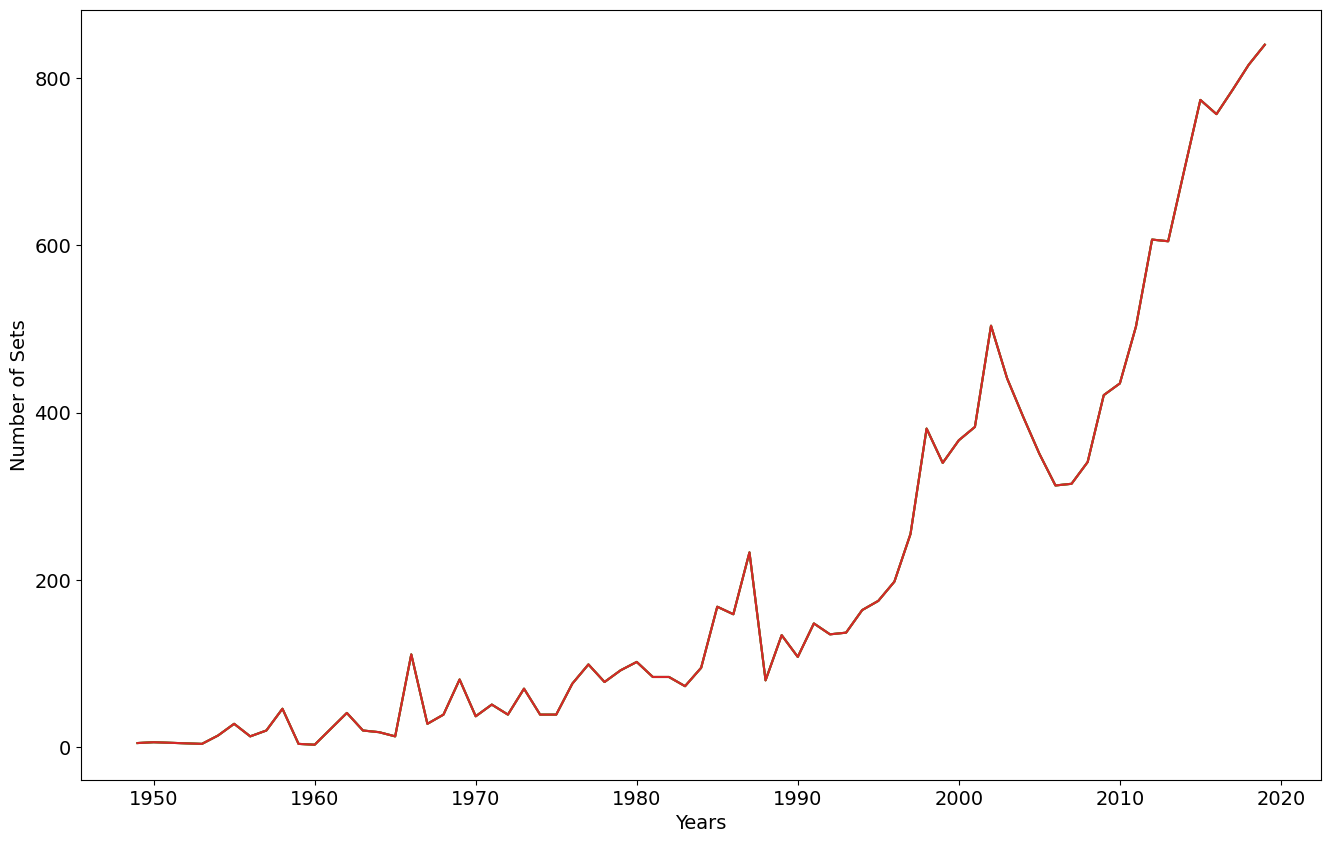

In [29]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Number of Sets",fontsize=14)
plt.xlabel("Years",fontsize=14)
plt.plot(sets_by_year.index[:-2],sets_by_year[:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [30]:
themes_by_year = sets_df.groupby("year").agg({"theme_id": "nunique"})
themes_by_year.rename(columns={"theme_id": "nr_themes"},inplace=True)
themes_by_year

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

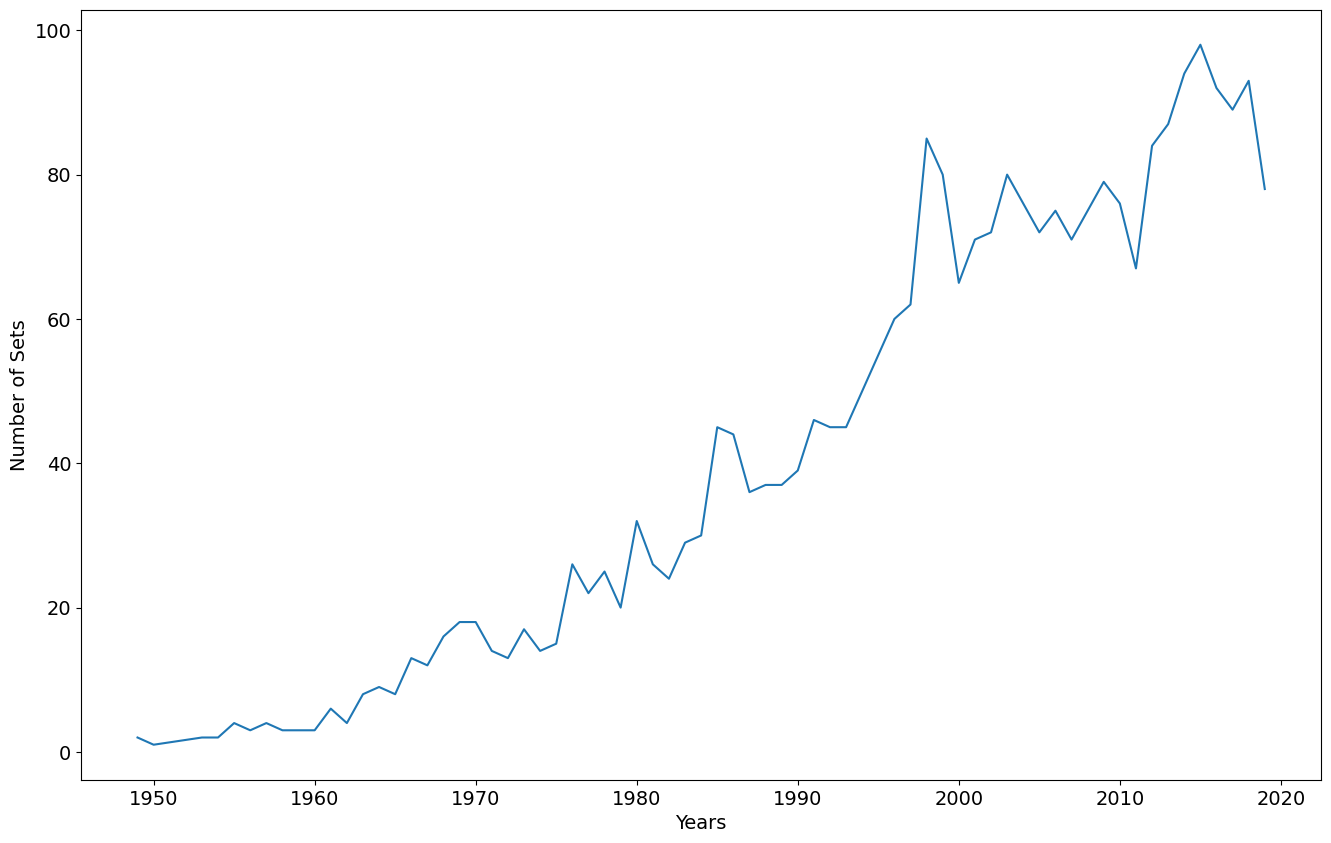

In [31]:

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Number of Sets",fontsize=14)
plt.xlabel("Years",fontsize=14)
plt.plot(themes_by_year.index[:-2],themes_by_year[:-2])

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'Number of Sets')

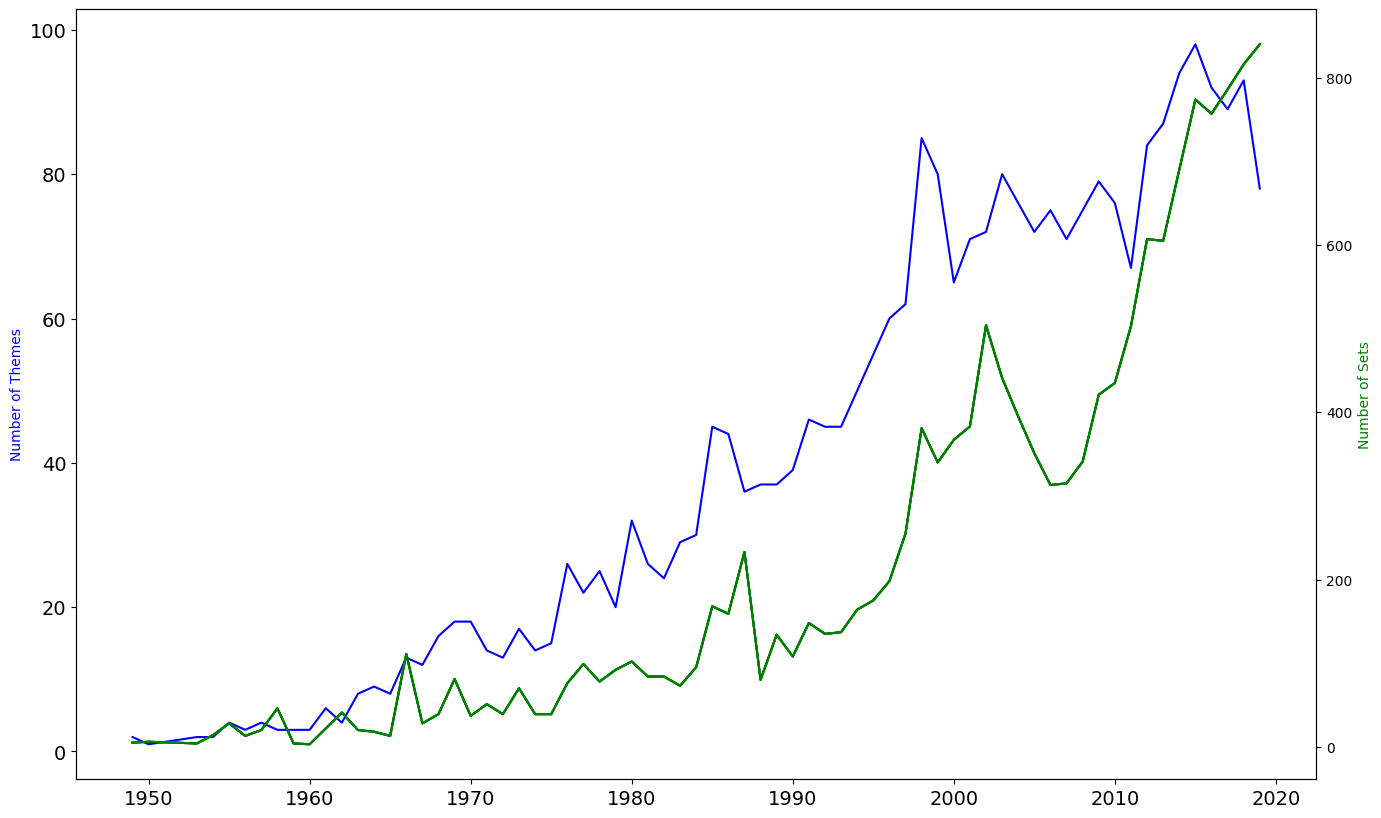

In [32]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax1 = plt.gca()
ax2 = ax1.twinx() #Shares the same x axis as the first one
ax1.plot(themes_by_year.index[:-2],themes_by_year[:-2],color="blue")
ax2.plot(sets_by_year.index[:-2],sets_by_year[:-2],color="green")
ax1.set_ylabel("Number of Themes",color="blue")
ax2.set_ylabel("Number of Sets",color="green")

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [35]:
parts_per_set = sets_df.groupby("year").agg({"num_parts": "mean"})
parts_per_set

,num_parts
year,
1949,100
1950,1
1953,14
1954,12
1955,37
...,...
2017,222
2018,214
2019,208


In [41]:
parts_per_set["num_parts"].loc[2017] - parts_per_set["num_parts"].loc[1954]

np.float64(209.48382406397673)

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

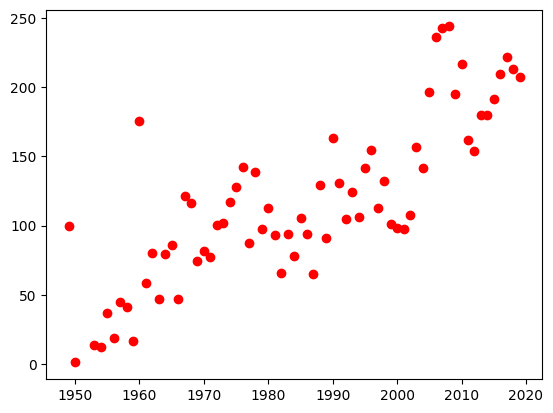

In [56]:
plt.scatter(parts_per_set.index[:-2],parts_per_set[:-2],c="r")

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [81]:
set_theme_count = sets_df["theme_id"].value_counts()
set_theme_count

theme_id
158    753
501    656
494    398
435    356
503    329
      ... 
156      1
519      1
530      1
475      1
414      1
Name: count, Length: 571, dtype: int64

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [83]:
themes_df = pd.read_csv("./data/themes.csv")
star_wars_ids = themes_df[themes_df["name"] == "Star Wars"]
themes_df

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1
2,3,Competition,1
3,4,Expert Builder,1
4,5,Model,1
...,...,...,...
591,705,Iron Man,696
592,706,Spider-Man,696
593,707,X-Men,696
594,708,The LEGO Batman Movie,697


In [ ]:
results = [] #Jupyter cant print inside a loop for whatever reason
for star_war_id in star_wars_ids["id"]:
    results.append(sets_df[sets_df["theme_id"] == star_war_id])
results[2].sort_values("year")


set_num  name                            year  theme_id  num_parts
75023-1  Star Wars Advent Calendar 2013  2013  209       254          1
75056-1  Star Wars Advent Calendar 2014  2014  209       273          1
75097-1  Star Wars Advent Calendar 2015  2015  209       291          1
75146-1  Star Wars Advent Calendar 2016  2016  209       282          1
75184-1  Star Wars Advent Calendar 2017  2017  209       309          1
75213-1  Star Wars Advent Calendar 2018  2018  209       307          1
75245-1  Star Wars Advent Calendar 2019  2019  209       280          1
75279-1  Star Wars Advent Calendar 2020  2020  209       312          1
7958-1   Star Wars Advent Calendar 2011  2011  209       267          1
9509-1   Star Wars Advent Calendar 2012  2012  209       235          1
Name: count, dtype: int64

### Merging (i.e., Combining) DataFrames based on a Key


In [82]:
set_theme_count = pd.DataFrame({"id":set_theme_count.index,
                                "set_count":set_theme_count.values})
set_theme_count

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329
...,...,...
566,156,1
567,519,1
568,530,1
569,475,1


In [84]:
merged_df = pd.merge(set_theme_count,themes_df,on="id")
merged_df

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501
...,...,...,...,...
566,156,1,Mini,155
567,519,1,NXT,518
568,530,1,Control Lab,529
569,475,1,Western,NaN


<BarContainer object of 10 artists>

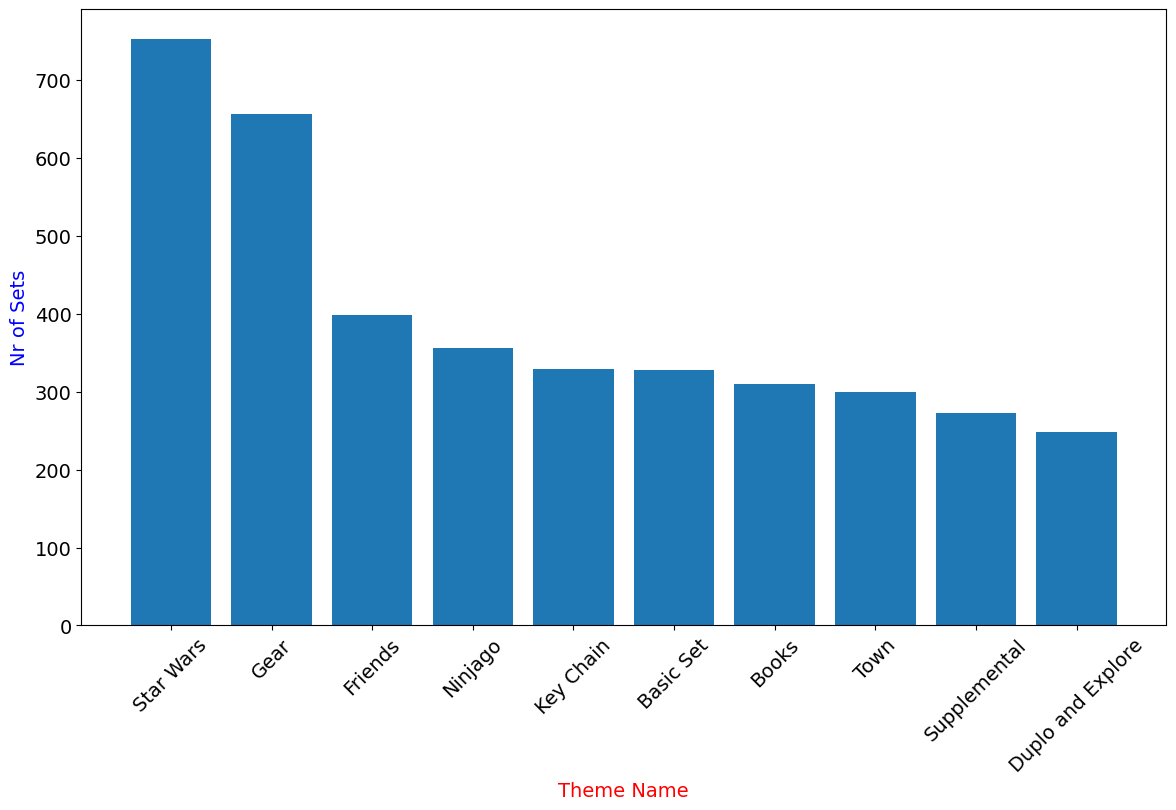

In [90]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14,color="blue")
plt.xlabel('Theme Name', fontsize=14,color="red")
plt.bar(merged_df["name"][:10],merged_df["set_count"][:10])